In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('hospital_admissions.csv')

In [3]:
data.head()

,admissions
0,92
1,85
2,80
3,87
4,79


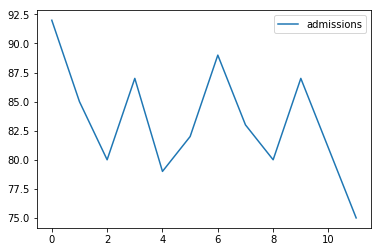

In [4]:
data.plot()
plt.show()

In [5]:
#compute moving average with time-lag as 3
moving_avg = data.rolling(3).mean()
moving_avg

,admissions
0,NaN
1,NaN
2,85.666667
3,84.000000
4,82.000000
5,82.666667
6,83.333333
7,84.666667
8,84.000000
9,83.333333


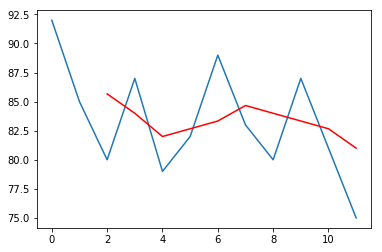

In [6]:
plt.plot(data)
plt.plot(moving_avg, color='red')

In [11]:
#compute moving average by taking period from 2 to n/2
#find best RMSE among all these

ls = []
for i in range(2,int(len(data)/2) +1):
    moving_avg = data.rolling(i).mean()
    diff = data - moving_avg
    diff.dropna(inplace = True)
    rmse = np.sqrt((diff**2).sum(axis=0)/len(diff))
    ls.append((rmse[0],i))
ls

[(3.0562900861844073, 2),
 (3.9200340134578786, 3),
 (3.181980515339464, 4),
 (3.9705163392183622, 5),
 (4.160471584991755, 6)]

In [12]:
best_rmse = min(ls)[0]
best_lag = min(ls)[1]
print ('For given data, best-suited lag is ', best_lag, 'with RMSE = ', best_rmse)

For given data, best-suited lag is  2 with RMSE =  3.0562900861844073


In [13]:
ideal_moving_avg = data.rolling(best_lag).mean()

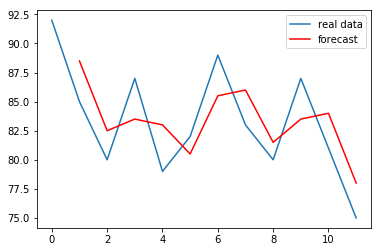

In [14]:
plt.plot(data, label = 'real data')
plt.plot(ideal_moving_avg, color = 'red', label = 'forecast')
plt.legend()